In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('m16_cpu_usage_clean.csv')
df['time'] = pd.to_datetime(df['time'])

In [3]:
df = df.dropna()
df

,time,cpu_util
0,2017-11-05 02:00:00+00:00,0.279063
1,2017-11-05 02:05:00+00:00,0.274687
2,2017-11-05 02:10:00+00:00,0.293007
3,2017-11-05 02:15:00+00:00,0.290867
4,2017-11-05 02:20:00+00:00,0.288103
...,...,...
11716,2017-12-15 18:20:00+00:00,0.178717
11717,2017-12-15 18:25:00+00:00,0.174243
11718,2017-12-15 18:30:00+00:00,0.182830
11719,2017-12-15 18:35:00+00:00,0.175027


In [4]:
df['lag_1'] = df['cpu_util'].shift(1)
df['lag_2'] = df['cpu_util'].shift(2)
df = df.dropna()
df

,time,cpu_util,lag_1,lag_2
2,2017-11-05 02:10:00+00:00,0.293007,0.274687,0.279063
3,2017-11-05 02:15:00+00:00,0.290867,0.293007,0.274687
4,2017-11-05 02:20:00+00:00,0.288103,0.290867,0.293007
5,2017-11-05 02:25:00+00:00,0.292210,0.288103,0.290867
6,2017-11-05 02:30:00+00:00,0.298967,0.292210,0.288103
...,...,...,...,...
11716,2017-12-15 18:20:00+00:00,0.178717,0.179103,0.175800
11717,2017-12-15 18:25:00+00:00,0.174243,0.178717,0.179103
11718,2017-12-15 18:30:00+00:00,0.182830,0.174243,0.178717
11719,2017-12-15 18:35:00+00:00,0.175027,0.182830,0.174243


In [5]:
X_cpu = df[['cpu_util', 'lag_1', 'lag_2']].to_numpy()
X_cpu

array([[0.29300667, 0.27468667, 0.27906333],
       [0.29086667, 0.29300667, 0.27468667],
       [0.28810333, 0.29086667, 0.29300667],
       ...,
       [0.18283   , 0.17424333, 0.17871667],
       [0.17502667, 0.18283   , 0.17424333],
       [0.17717778, 0.17502667, 0.18283   ]])

In [6]:
cpu_model = tf.keras.models.load_model('./cpu_model_2_3.h5')

In [7]:
cpu_predict = cpu_model.predict(X_cpu)

367/367 [==============================] - 1s 1ms/step


In [8]:
cpu_data = df.copy()

In [9]:
cpu_data['anomaly'] = np.where(cpu_predict > 0.5, 1, 0)
cpu_data

,time,cpu_util,lag_1,lag_2,anomaly
2,2017-11-05 02:10:00+00:00,0.293007,0.274687,0.279063,0
3,2017-11-05 02:15:00+00:00,0.290867,0.293007,0.274687,0
4,2017-11-05 02:20:00+00:00,0.288103,0.290867,0.293007,0
5,2017-11-05 02:25:00+00:00,0.292210,0.288103,0.290867,0
6,2017-11-05 02:30:00+00:00,0.298967,0.292210,0.288103,0
...,...,...,...,...,...
11716,2017-12-15 18:20:00+00:00,0.178717,0.179103,0.175800,0
11717,2017-12-15 18:25:00+00:00,0.174243,0.178717,0.179103,0
11718,2017-12-15 18:30:00+00:00,0.182830,0.174243,0.178717,0
11719,2017-12-15 18:35:00+00:00,0.175027,0.182830,0.174243,0


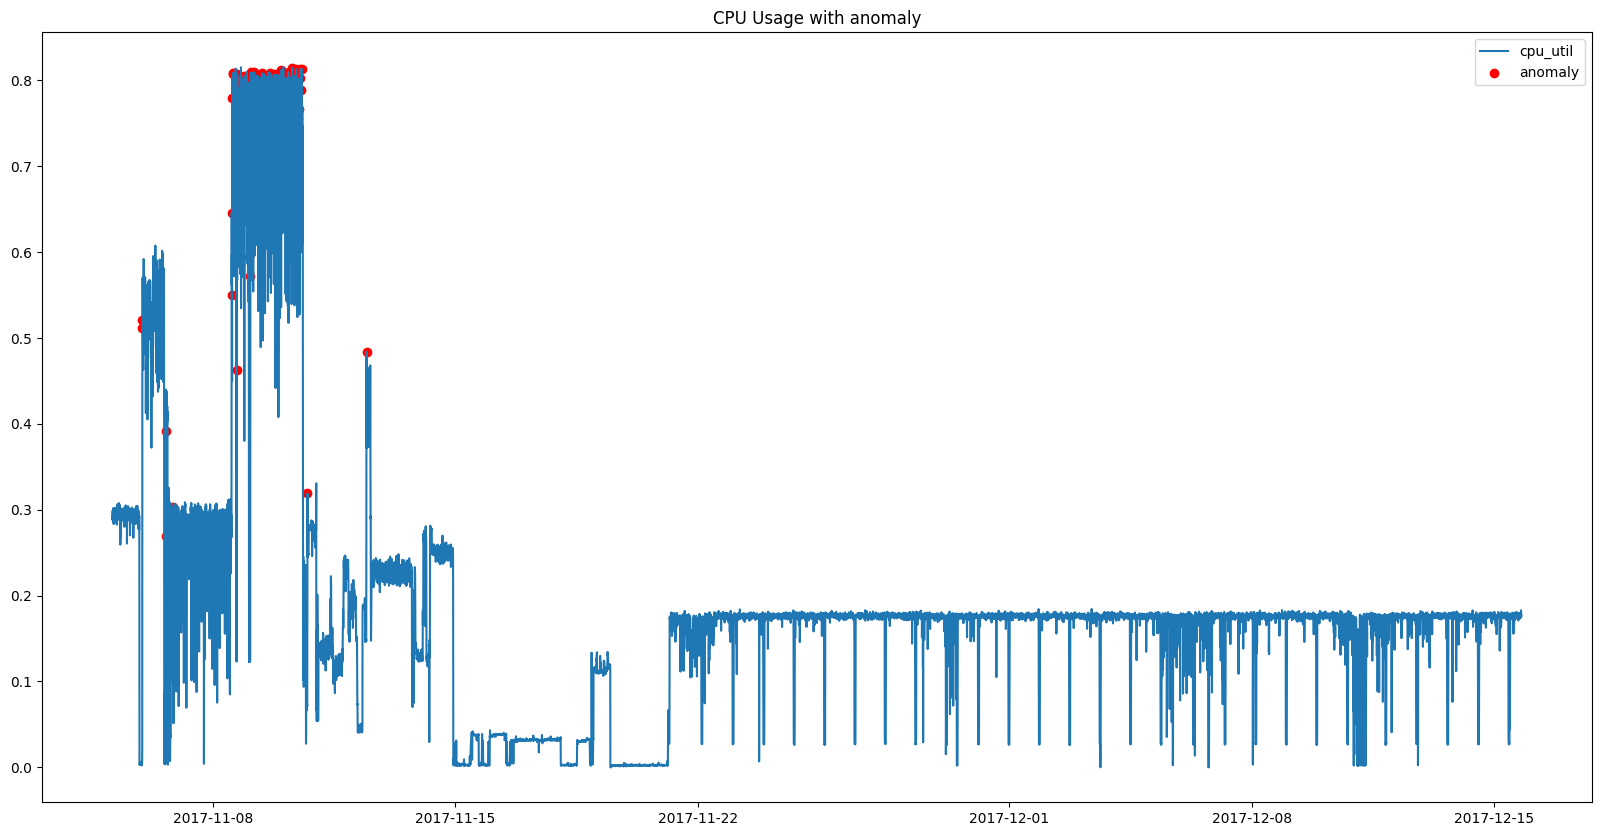

Total data = 11719 
Anomaly found: 86 
Anomaly percentage: 0.7338510111784282 %


In [10]:
plt.figure(figsize=(20,10))
plt.plot(cpu_data['time'], cpu_data['cpu_util'], label='cpu_util')
plt.scatter(cpu_data[cpu_data['anomaly'] == 1]['time'], cpu_data[cpu_data['anomaly'] == 1]['cpu_util'], color='red', label='anomaly')
plt.legend()
# plt.xlim(pd.Timestamp('2023-12-22'), pd.Timestamp('2023-12-24'))
# plt.xlim(pd.Timestamp('2023-12-12'), pd.Timestamp('2023-12-18'))
plt.title('CPU Usage with anomaly')
plt.show()
print('Total data =', len(cpu_data), '\nAnomaly found:', len(cpu_data.where(cpu_data['anomaly'] == 1).dropna()), '\nAnomaly percentage:', len(cpu_data.where(cpu_data['anomaly'] == 1).dropna())/len(cpu_data)*100, '%')


In [11]:
cpu_model.predict([
  [0.23982, 0.13298, 0.54698],
  [0.15362, 0.23982, 0.13298],
  [0.38353, 0.24362, 0.23982],
  [0.35437, 0.38353, 0.24362],
  [0.713252, 0.35437, 0.38353],
  [0.5543, 0.713252, 0.35437,],
  [0.8543, 0.5543, 0.713252],
  [0.77433, 0.85435, 0.5543],
  [0.89524, 0.77433, 0.85435,]
])

1/1 [==============================] - 0s 60ms/step


array([[1.0083573e-06],
       [3.6981062e-05],
       [1.4945315e-01],
       [6.3852046e-04],
       [9.9982083e-01],
       [9.3757687e-04],
       [9.9424589e-01],
       [4.8092786e-02],
       [8.8775650e-02]], dtype=float32)